## Load Image
### Import Dependencies

In [42]:
!pip3 install tensorflow

  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.0 MB/s eta 0:00:00a 0:00:01
  Using cached charset_normalizer-3.3.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (33 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.1-py3-none-any.whl.metadata (6.4 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl.metadata (2.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 2.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 8.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 8.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3

In [43]:
import cv2 as cv
import sys
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr # ssl issue
import pytesseract # read 1 as 7 and 0 as oO
from PIL import Image
from pytesseract import Output
import keras_ocr # ssl issue

2024-05-01 15:54:22.111160: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Experimentation

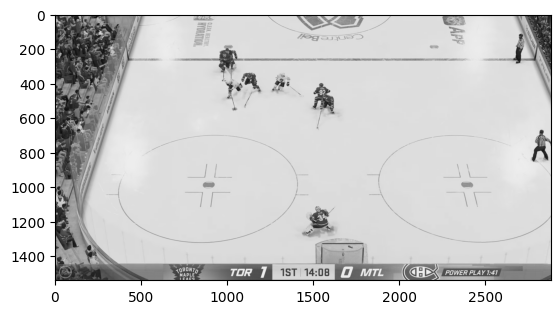

In [2]:
img = cv.imread(cv.samples.findFile("chel.png"))
 
if img is None:
 sys.exit("Could not read the image.")
 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))
plt.show()

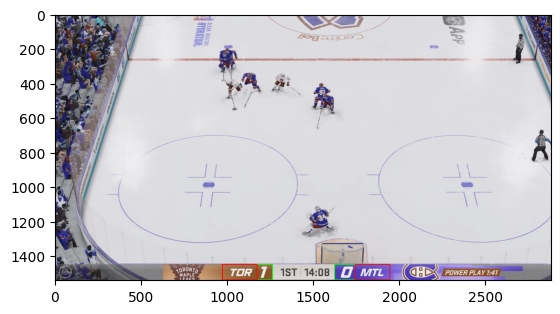

In [3]:
newimg = cv.rectangle(img,(1170,1450), (1260, 1540), (0,255,0),3)
newimg = cv.rectangle(img,(1620,1450), (1740, 1540), (0,255,0),3)
newimg = cv.rectangle(img,(970,1450), (1170, 1540), (255,0,0),3)
newimg = cv.rectangle(img,(1740,1450), (1940, 1540), (255,0,0),3)
plt.imshow(newimg)
plt.show()

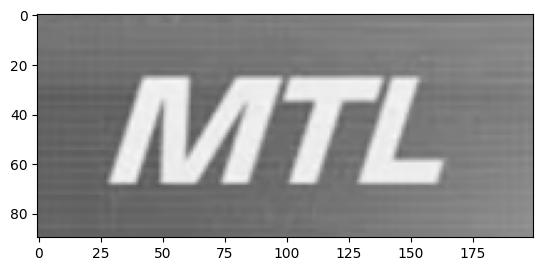

In [4]:
home_team = gray[1450:1540,1740:1940]
plt.imshow(cv.cvtColor(home_team, cv.COLOR_BGR2RGB))
plt.show()

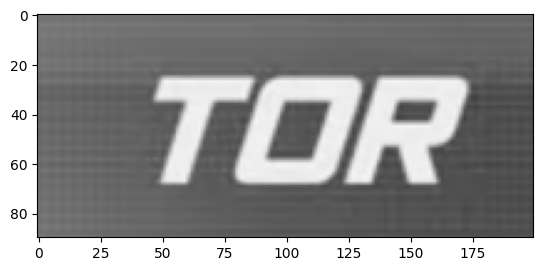

In [5]:
away_team = gray[1450:1540,970:1170]
plt.imshow(cv.cvtColor(away_team, cv.COLOR_BGR2RGB))
plt.show()

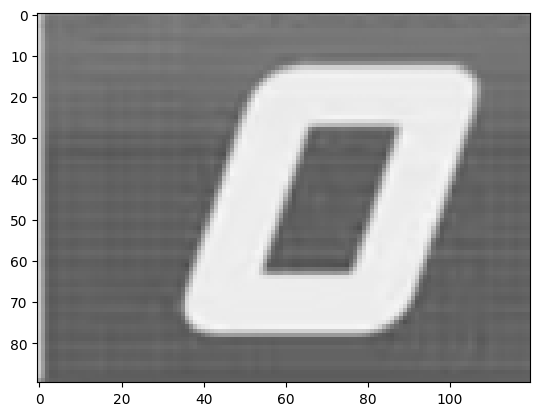

In [6]:
home_score = gray[1450:1540, 1620:1740]
plt.imshow(cv.cvtColor(home_score, cv.COLOR_BGR2RGB))
plt.show()

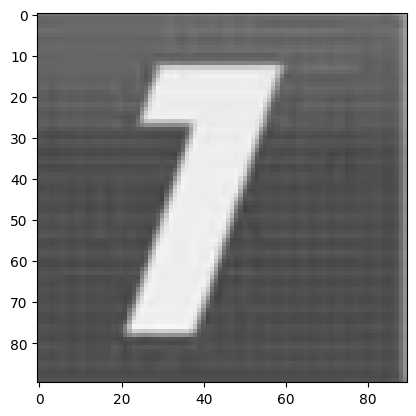

In [7]:
away_score = gray[1450:1540, 1170:1260]
plt.imshow(cv.cvtColor(away_score, cv.COLOR_BGR2RGB))
plt.show()

In [47]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/Cellar/tesseract/5.3.4_1/bin/tesseract'
thresh = cv.threshold(away_score, 150, 255, cv.THRESH_BINARY_INV)[1]

result = cv.GaussianBlur(thresh, (5,5), 0)
result = 255 - result

data = pytesseract.image_to_string(result, lang='EASPORTS15.ttf',config='--psm 10')
print(data)

TesseractError: (1, 'Error opening data file /usr/local/share/tessdata/EASPORTS15.ttf.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'EASPORTS15.ttf\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

In [9]:
thresh = cv.threshold(away_team, 150, 255, cv.THRESH_BINARY_INV)[1]

result = cv.GaussianBlur(thresh, (5,5), 0)
result = 255 - result

data = pytesseract.image_to_string(result, lang='eng',config='--psm 6')
print(data)

TOR



In [10]:
thresh = cv.threshold(home_team, 150, 255, cv.THRESH_BINARY_INV)[1]

result = cv.GaussianBlur(thresh, (5,5), 0)
result = 255 - result

data = pytesseract.image_to_string(result, lang='eng',config='--psm 6')
print(data)

MTL



In [24]:
thresh = cv.threshold(home_score, 150, 255, cv.THRESH_BINARY_INV)[1]

result = cv.GaussianBlur(thresh, (5,5), 0)
result = 255 - result

data = pytesseract.image_to_string(result, lang='eng',config='--psm 10 --oem 1 tessedit_char_whitelist=012345689')
print(data)

oO



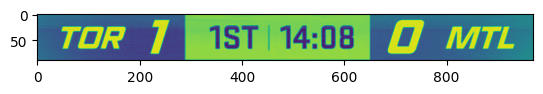

In [26]:
scoreboard = gray[1450:1540, 970:1940]
plt.imshow(scoreboard)
plt.show()

In [31]:
thresh = cv.threshold(scoreboard, 150, 255, cv.THRESH_BINARY_INV)[1]

result = cv.GaussianBlur(thresh, (5,5), 0)
result = 255 - result

data = pytesseract.image_to_string(result, lang='eng',config='--psm 13')
print(data)

7*) em 1ST 14:08 Wee



In [35]:
filename = 'chel_scoreboard.png'
img = np.array(Image.open(filename))
text = pytesseract.image_to_string(img)
print(text)

1(0/-may im 1ST 14:08



In [37]:
filename = 'chel_scoreboard.png'
img = np.array(Image.open(filename))
text = pytesseract.image_to_string(img, output_type=Output.DICT)
print(text)

{'text': '1(0/-may im 1ST 14:08\n'}


In [44]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /Users/matthewbeck/.keras-ocr/craft_mlt_25k.h5


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)>

## Collect readings from a video